In [1]:
from keras import models, layers
import numpy as np

In [3]:
from keras.datasets import imdb
 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

c:\Users\lukas\Documents\Projects\practical-aspects-of-deep-learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
network.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
from sklearn.model_selection import train_test_split

x_val, partial_x_test, y_val, partial_y_test = train_test_split(x_test, y_test, test_size=0.6, random_state=42)

In [14]:
history = network.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8103 - loss: 0.4889 - val_accuracy: 0.8690 - val_loss: 0.3648
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9001 - loss: 0.2908 - val_accuracy: 0.8825 - val_loss: 0.2984
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9208 - loss: 0.2230 - val_accuracy: 0.8834 - val_loss: 0.2890
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9338 - loss: 0.1882 - val_accuracy: 0.8860 - val_loss: 0.2897
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9426 - loss: 0.1633 - val_accuracy: 0.8747 - val_loss: 0.3222
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9502 - loss: 0.1442 - val_accuracy: 0.8765 - val_loss: 0.3266
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9561 - loss: 0.1285 - val_accuracy: 0.8713 - val_loss: 0.3526
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9618 - loss: 0.1147 - val_accuracy: 0.8683 - val_lo

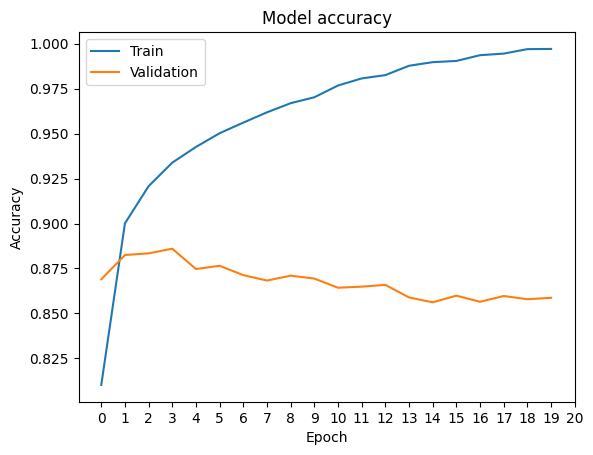

In [17]:
from matplotlib import pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xticks(np.arange(0, 21, 1))
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
test_loss, test_acc = network.evaluate(partial_x_test, partial_y_test)
 
print('test_acc:', test_acc)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.6301
test_acc: 0.8600666522979736


In [22]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

In [23]:
callbacks = myCallback()
 
network.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
761/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9951 - loss: 0.0192
Reached 90% accuracy so cancelling training!
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9915 - loss: 0.0269
